In [1]:
import numpy as np
import tensorflow as tf
import pathlib
import PIL

import os
import matplotlib.pyplot as plt

In [2]:
dataset_url = 'http://download.tensorflow.org/example_images/flower_photos.tgz'

archive = tf.keras.utils.get_file(origin=dataset_url, extract=True) #, cache_dir=)
data_dir = pathlib.Path(archive).with_suffix('')

In [3]:
batch_size=32
img_height = 180
img_width = 180

## Image_dataset_from_directory
**Automate what we have did at previuose notebook**

In [4]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [5]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [7]:
class_names = train_dataset.class_names
class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [10]:
for img, lbl in train_dataset.take(1):
    print(img.shape)
    print(lbl.numpy())


(32, 180, 180, 3)
[1 2 3 3 1 2 4 4 4 4 1 4 3 1 2 1 0 3 3 0 4 3 3 1 4 1 4 4 1 1 1 1]


In [17]:
for image_batch, label_batch in train_dataset:
    print(image_batch.shape)
    print(label_batch.shape)
    break;


(32, 180, 180, 3)
(32,)


## Visualisation

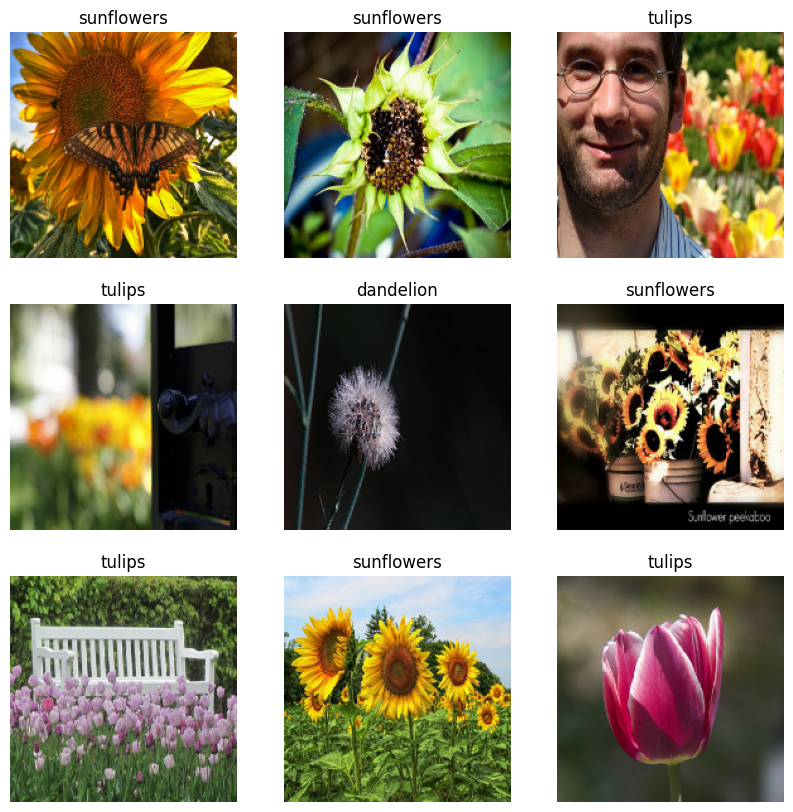

In [9]:
image_batch, label_batch = next(iter(train_dataset))

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    
    label = label_batch[i]
    plt.title(class_names[label])
    
    plt.axis("off")
    # break

## Rescale

In [28]:
# Normalize data between [0, 1]
normalization_layer = tf.keras.layers.Rescaling(1./255)

# Normalize data between [-1, 1]
# normalization_layer = tf.keras.layers.Rescaling(1./127.5, offset=-1)


## Let Normalization done by CPU
**NOTE: through this method, must pass normalized data to model, insted of train dataset**

In [29]:
normalized_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))

In [30]:
image_batch, label_batch = next(iter(normalized_dataset))
first_image = image_batch[0]

print(np.min(first_image), np.max(first_image))

0.0023856203 0.9902778


In [31]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

## Create NN Model
### Normalization run on GPU

In [12]:
len(class_names)

5

In [32]:
num_classes = len(class_names)

model = tf.keras.Sequential([
    # Data normalization run on GPU
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)
    
])

In [33]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_8 (Rescaling)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
             )

In [35]:
history = model.fit(train_dataset,
                    validation_data=validation_dataset,
                    epochs=3)

Epoch 1/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 31s 295ms/step - accuracy: 0.3576 - loss: 1.4681 - val_accuracy: 0.5722 - val_loss: 1.0917
Epoch 2/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 24s 263ms/step - accuracy: 0.5883 - loss: 1.0492 - val_accuracy: 0.5940 - val_loss: 1.0145
Epoch 3/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 211ms/step - accuracy: 0.6651 - loss: 0.8883 - val_accuracy: 0.6431 - val_loss: 0.9368


In [ ]:
plt.plot(history.history['accuracy'], marker='o', color='blue',label='accuracy')
plt.plot(history.history['val_accuracy'], marker='o' ,color='orange' ,label='validation accuracy')
plt.title('Trainig and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(history.history['loss'],  marker='o', color='blue',label='loss')
plt.plot(history.history['val_loss'],  marker='o', color='red',label='validation loss')
plt.title('Trainig and Validation Loss')
plt.legend()

# TensorFlow datase

In [38]:
import tensorflow_datasets as tfds

In [39]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'ai2dcaption',
 'aloha_mobile',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'asu_table_top_converted_externally_to_rlds',
 'austin_buds_dataset_converted_externally_to_rlds',
 'austin_sailor_dataset_converted_externally_to_rlds',
 'austin_sirius_dataset_converted_externally_to_rlds',
 'bair_robot_pushing_small',
 'bc_z',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'berkeley_autolab_ur5',
 'berkeley_cable_routing',
 'berkeley_fanuc_manipulation',
 'berkeley_gnm_cory_hall',
 'berkeley_gnm_recon',
 'berkeley_gnm_sac_son',
 'berkeley_mvp_converted_externally_to_rlds',
 'berkeley_rpt_converted_externally_to_rlds',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bot_adversarial_dialogue',
 'bridge',
 'bridge_data_msr',
 'bucc',
 'c4',
 'c4_ws

In [51]:
(train_dataset, validation_dataset, test_dataset), metadata = tfds.load(   
    'tf_flowers',
    split=['train[:80]', 'train[80:90]', 'train[90:]'],    
    with_info=True,
    as_supervised=True
)

# tfds.Split.TRAIN.subsplit(tfds.percent[:70]),
#         tfds.Split.TRAIN.subsplit(tfds.percent[70:])

In [53]:
num_classes = metadata.features['label'].num_classes
print(num_classes)

5


### Retrieve Image form the datase

Text(0.5, 1.0, 'tulips')

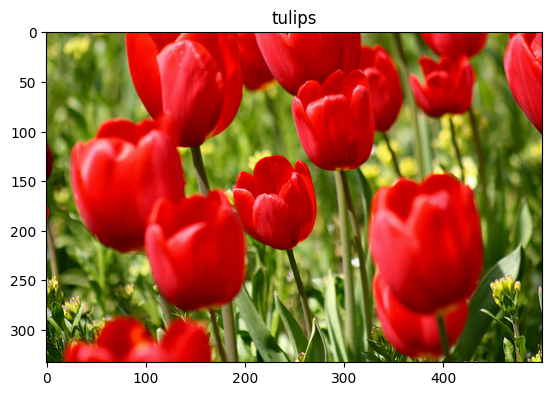

In [55]:
get_label_name = metadata.features['label'].int2str

image, label = next(iter(train_dataset))
plt.imshow(image)
plt.title(get_label_name(label))